Testing the nscore transformation table
========



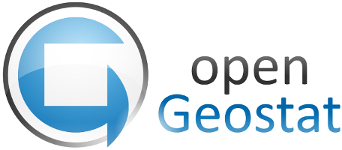

In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib   
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `pygslib.gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= pygslib.gslib.read_gslib_file('../datasets/cluster.dat')  

In [3]:
# This is a 2D file, in this GSLIB version we require 3D data and drillhole name or domain code
# so, we are adding constant elevation = 0 and a dummy BHID = 1 
mydata['Zlocation']=0
mydata['bhid']=1

# printing to verify results
print ' \n **** 5 first rows in my datafile \n\n  ', mydata.head(n=5)

 
 **** 5 first rows in my datafile 

      Xlocation  Ylocation  Primary  Secondary  Declustering Weight  Zlocation  \
0       39.5       18.5     0.06       0.22                1.619          0   
1        5.5        1.5     0.06       0.27                1.619          0   
2       38.5        5.5     0.08       0.40                1.416          0   
3       20.5        1.5     0.09       0.39                1.821          0   
4       27.5       14.5     0.09       0.24                1.349          0   

   bhid  
0     1  
1     1  
2     1  
3     1  
4     1  


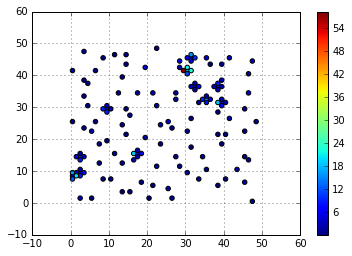

In [4]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

## The nscore transformation table function


In [5]:
print pygslib.gslib.__dist_transf.ns_ttable.__doc__


transin,transout,error = ns_ttable(va,wt,[nd,despike])

Wrapper for ``ns_ttable``.

Parameters
----------
va : input rank-1 array('d') with bounds (nd)
wt : input rank-1 array('d') with bounds (nd)

Other Parameters
----------------
nd : input int, optional
    Default: len(va)
despike : input int

Returns
-------
transin : rank-1 array('d') with bounds (nd)
transout : rank-1 array('d') with bounds (nd)
error : int



**Note that the input can be data or a reference distribution function**

## Normal score transformation table using delustering wight

In [6]:
dtransin,dtransout, error = pygslib.gslib.__dist_transf.ns_ttable(mydata['Primary'],mydata['Declustering Weight'])

dttable= pd.DataFrame({'z': dtransin,'y': dtransout})

print dttable.head(3)
print dttable.tail(3) 
print 'there was any error?: ', error!=0

          y     z
0 -2.525176  0.06
1 -2.111934  0.06
2 -1.908162  0.08
            y      z
137  2.435850  21.08
138  2.594300  22.75
139  2.946472  58.32
there was any error?:  False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B713940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000124BE470>]], dtype=object)

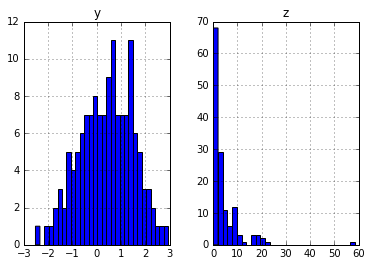

In [7]:
dttable.hist(bins=30)

Normal score transformation table without delustering wight

In [8]:
transin,transout, error = pygslib.gslib.__dist_transf.ns_ttable(mydata['Primary'],np.ones(len(mydata['Primary'])))

ttable= pd.DataFrame({'z': transin,'y': transout})

print ttable.head(3)
print ttable.tail(3)

          y     z
0 -2.690109  0.06
1 -2.300347  0.06
2 -2.100166  0.08
            y      z
137  2.100166  21.08
138  2.300347  22.75
139  2.690109  58.32


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012923400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B812C88>]], dtype=object)

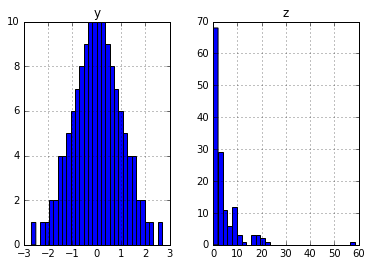

In [9]:
ttable.hist(bins=30)

## Comparing results

In [10]:
parameters_probplt = {
        'iwt'  : 0,                      #int, 1 use declustering weight
        'va'   : ttable.y,               # array('d') with bounds (nd)
        'wt'   : np.ones(len(ttable.y))} # array('d') with bounds (nd), wight variable (obtained with declust?)

parameters_probpltl =  {
        'iwt'  : 0,                       #int, 1 use declustering weight
        'va'   : dttable.y,               # array('d') with bounds (nd)
        'wt'   : np.ones(len(dttable.y))} # array('d') with bounds (nd), wight variable (obtained with declust?)


binval,cl,xpt025,xlqt,xmed,xuqt,xpt975,xmin,xmax, \
xcvr,xmen,xvar,error = pygslib.gslib.__plot.probplt(**parameters_probplt)

binvall,cll,xpt025l,xlqtl,xmedl,xuqtl,xpt975l,xminl, \
xmaxl,xcvrl,xmenl,xvarl,errorl = pygslib.gslib.__plot.probplt(**parameters_probpltl)


<bound method Figure.show of <matplotlib.figure.Figure object at 0x000000000B7EA588>>

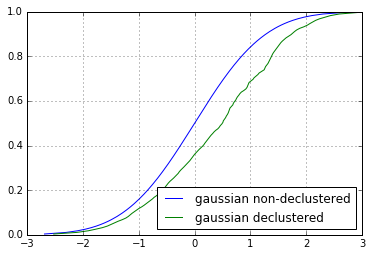

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (cl, binval, label = 'gaussian non-declustered')
plt.plot (cll, binvall, label = 'gaussian declustered')
plt.legend(loc=4)
plt.grid(True)
fig.show